In [1]:
import pandas as pd

In [2]:
house_rental = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')
house_rental.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


# 2. Find all houses which has more than 2 bedroom and price less than 50k

In [5]:
house_rental[(house_rental.Bedroom > 2) & (house_rental.Price < 50000)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
9,1152.792,10,12,3,2,2,45000
13,1352.040,9,19,4,2,2,39000
20,1174.140,3,9,3,2,1,33000
...,...,...,...,...,...,...,...
634,1167.024,2,12,3,2,2,38000
635,996.240,3,5,3,1,1,28000
640,1266.648,6,7,3,2,2,40000
644,1359.156,7,15,3,2,2,45000


# 3. Find all houses which has more than 3 bedroom and price less than 50k. Update their price with 60k

In [6]:
def f(house_rental):
    if (house_rental.Bedroom > 3) & (house_rental.Price < 50000):
        return 60000
    else:
        return house_rental.Price


house_rental["new_price"] = house_rental.apply(f,axis = 1)

# 4. Find no of house who's price is updated in previous question

In [10]:
house_rental["new_price"].value_counts().sum()

645

# 5. Find average price of house.

In [14]:
house_rental["new_price"].mean()

62621.71317829457

# 6. Find average price of house respective to bedroom.

In [77]:
house_rental.groupby(['Bedroom']).Price.mean()

Bedroom
1     35549.086957
2     47131.689441
3     65030.949791
4     77745.434783
5    117000.000000
6    180000.000000
7    180000.000000
Name: Price, dtype: float64


# 7. Find details of house whose price is highest.

In [15]:
house_rental[house_rental.Price == house_rental.Price.max()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,new_price
289,3504.63,13,14,2,2,2,250000,250000.0


# 8. Sort the given data by price in ascending order

In [16]:
house_rental.sort_values("Price", ascending = True )

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,new_price
613,996.24,4,5,3,2,1,6100,6100.0
408,604.86,5,5,2,0,1,11900,11900.0
624,711.60,1,1,3,1,1,12000,12000.0
375,426.96,9,12,1,0,1,13000,13000.0
276,533.70,7,12,1,1,1,17000,17000.0
...,...,...,...,...,...,...,...,...
27,3664.74,19,19,3,2,3,200000,200000.0
473,3842.64,15,16,3,1,2,200000,200000.0
303,3664.74,9,13,5,1,2,206000,206000.0
149,4981.20,3,38,3,2,3,225000,225000.0


# 9. Display all details of house with 1 bedroom first then 2 bedroom.. and so on

In [78]:
house_rental.sort_values(by='Bedroom').groupby('Bedroom').describe()

Sqft                                                         \
         count         mean         std       min       25%       50%   
Bedroom                                                                 
1         69.0   704.896522  325.237204   359.358   523.026   640.440   
2        161.0  1095.090522  498.594814   434.076   740.064   925.080   
3        239.0  1675.862661  730.002273   651.114  1184.814  1458.780   
4        161.0  1945.916609  502.503797   857.478  1572.636  1889.298   
5         13.0  2808.630462  795.128143  1579.752  2312.700  2700.522   
6          1.0  5856.468000         NaN  5856.468  5856.468  5856.468   
7          1.0  4198.440000         NaN  4198.440  4198.440  4198.440   

                             Floor             ...     Price            \
              75%       max  count       mean  ...       75%       max   
Bedroom                                        ...                       
1         782.760  2134.800   69.0   6.304348  ...   43000.0   67000.0   
2        1423.200  3558.000  161.0   6.024845  ...   55000.0  250000.0   
3        1908.867  5760.402  239.0   5.640167  ...   78500.0  225000.0   
4        2138.358  3255.570  161.0   5.689441  ...   98000.0  160000.0   
5        3202.200  4643.190   13.0  10.769231  ...  145000.0  206000.0   
6        5856.468  5856.468    1.0   7.000000  ...  180000.0  180000.0   
7        4198.440  4198.440    1.0  15.000000  ...  180000.0  180000.0   

        new_price                                                             \
            count           mean           std       min       25%       50%   
Bedroom                                                                        
1            69.0   35549.086957  11101.949542   13000.0   26000.0   35000.0   
2           161.0   47131.689441  23138.981748   11900.0   35000.0   43500.0   
3           239.0   65030.949791  39100.727939    6100.0   40000.0   50000.0   
4           161.0   80288.937888  26562.966327   50000.0   60000.0   73000.0   
5            13.0  117000.000000  50071.615379   55000.0   80000.0  100000.0   
6             1.0  180000.000000           NaN  180000.0  180000.0  180000.0   
7             1.0  180000.000000           NaN  180000.0  180000.0  180000.0   

                             
              75%       max  
Bedroom                      
1         43000.0   67000.0  
2         55000.0  250000.0  
3         78500.0  225000.0  
4         98000.0  160000.0  
5        145000.0  206000.0  
6        180000.0  180000.0  
7        180000.0  180000.0  

[7 rows x 56 columns]

# 10. Display all details of each house with 1 bedroom first then 2 bedroom.. and so on.

In [79]:
house_rental.sort_values(by='Bedroom')


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,new_price
349,370.032,4,7,1,1,1,24888,24888.0
432,925.080,2,18,1,2,1,51000,51000.0
241,789.876,7,9,1,1,1,42000,42000.0
423,469.656,7,7,1,1,1,34000,34000.0
248,1106.538,3,12,1,2,1,50000,50000.0
...,...,...,...,...,...,...,...,...
331,2892.654,19,21,5,3,4,170000,170000.0
360,2312.700,7,16,5,2,3,55000,55000.0
303,3664.740,9,13,5,1,2,206000,206000.0
576,5856.468,7,21,6,2,5,180000,180000.0


In [19]:
hc_df = pd.read_excel('datasets/HealthCareData-1.xlsx')
hc_df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES



# 1. Display all the information respective to gender.

In [33]:
hc_df[(hc_df.Gender == 'male')].head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
5,6,55,male,urban,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [32]:
hc_df[(hc_df.Gender == 'female')].head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
50,51,49,female,rural,20,2,country liquor,Positive,negative,YES,...,1.7,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES
51,52,50,female,rural,20,2,country liquor,Positive,negative,YES,...,1.7,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES
52,53,49,female,rural,20,2,country liquor,Positive,Positive,YES,...,1.7,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES
53,54,49,female,rural,20,2,country liquor,Positive,negative,YES,...,1.7,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES


# 2. Find all the male who is consuming alcohal more than 5 years and has diabetes result positive.

In [21]:
hc_df[(hc_df.Gender == 'male') & (hc_df['Duration of alcohol consumption(years)'] >5) & (hc_df['Diabetes Result'] == 'YES')]

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
5,6,55,male,urban,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
6,7,55,male,urban,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,921,49,male,rural,15,3,both,negative,negative,YES,...,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no,YES
922,923,49,male,urban,15,3,both,negative,negative,YES,...,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no,YES
924,925,49,male,rural,15,3,branded liquor,negative,negative,YES,...,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no,YES
926,927,49,male,rural,15,3,both,negative,negative,YES,...,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no,YES


# 1. Display all the information respective to gender.

In [52]:
hc_df['Gender'].describe()

count      950
unique       4
top       male
freq       739
Name: Gender, dtype: object

# 2.  Find where more people consume alcohol in rural or urban?

In [ ]:
hc_df[(hc_df.Gender == 'male') & (hc_df['Duration of alcohol consumption(years)'] >5) & (hc_df['Diabetes Result'] == 'YES')]

# 3. Find where more people consume alcohol in rural or urban?

In [ ]:
print('urban count :',(hc_df['Place(location where the patient lives)'] == 'urban').value_counts())
print('rural count :',(hc_df['Place(location where the patient lives)'] == 'rural').value_counts())

# 4. Find average age of male and female who consume alcohol.

In [50]:
print("male age avg",hc_df[hc_df['Gender'] == 'male'].Age.mean())
print("female age avg",hc_df[hc_df['Gender'] == 'female'].Age.mean())

male age avg 50.115020297699594
female age avg 52.54358974358974


# 5. Display distribution for different type of alcohol.

(array([183.,   0.,   0., 288.,   0.,   0., 478.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

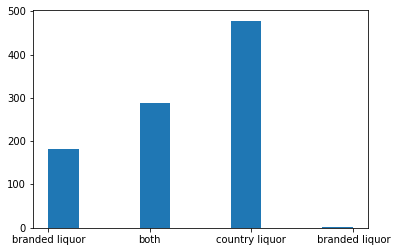

In [64]:
import matplotlib.pyplot as plt
plt.hist(hc_df['Type of alcohol consumed'])

# 6. Display average age of perople who has diabetes positive.

In [76]:
import matplotlib.pyplot as plt
hc_df[hc_df['Diabetes Result'] == 'YES'].Age.mean()


50.68006182380216

# 7.  Find is there any missing value of age in given data.

In [53]:
hc_df[hc_df['Age'].isnull()]

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)


# 8. If gender is male and age is less than 35 then change diabetes result to NO .

In [37]:
hc_df[(hc_df.Gender == 'male') & (hc_df['Age'] < 35) & (hc_df['Diabetes Result'] == 'NO')]

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)


# 9. Find all record where Place is missing.

In [44]:
miss = pd.isnull(hc_df['Place(location where the patient lives)'])

In [46]:
hc_df[miss]

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
190,191,50,male,NaN,28,3,both,Positive,Positive,YES,...,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES,NaN
198,199,50,male,NaN,28,3,both,Positive,Positive,YES,...,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES,YES
199,200,44,male,NaN,25,3,both,Positive,Positive,YES,...,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES,YES
245,246,42,male,NaN,20,1,country liquor,negative,negative,YES,...,1.3,6.8,3.0,3.8,0.78,122.0,96,34,YES,YES
295,296,46,male,NaN,18,2,country liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,115.0,68,35,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,38,male,NaN,10,3,both,negative,negative,YES,...,NaN,6.1,2.1,4.3,0.48,130.0,56,48,YES,YES
911,912,50,male,NaN,20,3,both,negative,negative,NO,...,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no,NaN
917,918,50,female,NaN,20,3,both,negative,negative,NO,...,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no,YES
927,928,50,male,NaN,18,3,both,negative,negative,NO,...,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no,YES


# 10. Change place to urban if gender is female else rural.

In [63]:
def f(hc_df):
    if hc_df.Gender == 'female':
        return 'urban'
    else:
        return hc_df['Place(location where the patient lives)']


hc_df['new place'] = hc_df.apply(f, axis =1)

In [81]:
hc_df[hc_df.Gender == 'female'].head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),new place
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES,urban
50,51,49,female,rural,20,2,country liquor,Positive,negative,YES,...,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES,urban
51,52,50,female,rural,20,2,country liquor,Positive,negative,YES,...,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES,urban
52,53,49,female,rural,20,2,country liquor,Positive,Positive,YES,...,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES,urban
53,54,49,female,rural,20,2,country liquor,Positive,negative,YES,...,6.5,3.2,2.8,1.214,151.0,48,88,YES,YES,urban
